In [6]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [7]:
# Import the Boston housing data set from sklearn and get description
boston_dataset = load_boston()

In [8]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target

In [15]:
# Create a bunch of samples, each with sample size of 20
sample = housing_data.sample(30)
sample_set = [housing_data.sample(30) for x in range(0,10)]
print(f'{sem(sample.MEDV)}')

1.9294770299735113


In [16]:
# Calculate standard error of means
means = [sample.MEDV.mean() for sample in sample_set]
standard_error = [sem(sample.MEDV) for sample in sample_set]
x_axis = np.arange(0,len(sample_set),1)+1

In [25]:
# Determine which sample's mean is closest to the population mean
df = pd.DataFrame(list(zip(means,standard_error)),columns=['Means','SEM'])
total_mean = housing_data['MEDV'].mean()
df['Mean Difference'] = df['Means'] - total_mean
df
#sample #5 has lowest sem and a low difference

,Means,SEM,Mean Difference
0,25.693333,1.633295,3.160527
1,22.953333,1.716510,0.420527
2,22.530000,1.608198,-0.002806
3,21.463333,1.783349,-1.069473
4,22.783333,1.212702,0.250527
5,20.696667,1.397489,-1.836140
6,23.613333,1.665082,1.080527
7,21.846667,1.789861,-0.686140
8,21.073333,1.282239,-1.459473
9,18.070000,1.574730,-4.462806


In [26]:
# Compare to the population mean
total_mean

22.532806324110698

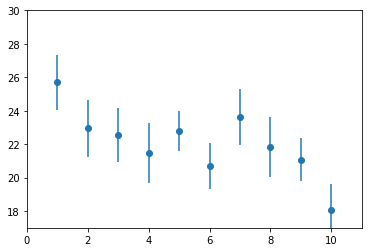

In [27]:
# Plot sample means with error bars
fig, ax=plt.subplots()
ax.errorbar(x_axis,means,standard_error,fmt='o')
ax.set_xlim(0,len(sample_set)+1)
ax.set_ylim(17,30)
plt.show()